# Importing Required Libraries & Datasets

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [90]:
sns.set(rc={'figure.figsize':(15,10)})

In [91]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [92]:
raw_data.head(7)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
312505,312443,500,500,450.0,36 months,9.76%,16.08,B,B2,"Hughes, Hubbard & Reed LLP",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
242695,242682,500,500,500.0,36 months,10.71%,16.31,B,B5,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
216698,174214,500,500,500.0,36 months,10.46%,16.25,B,B5,THe University of Illinois,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
211133,210644,500,500,475.0,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
164346,163835,500,500,400.0,36 months,8.07%,15.69,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306018,305720,700,700,700.0,36 months,12.29%,23.35,C,C5,SDSU Residential Life,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
311591,311571,725,725,650.0,36 months,7.37%,22.51,A,A1,"Team Awesome Productions, Inc.",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1. Cleaning Data

### This step involves cleaning data and converting them into respective formats which can be easily considered for quick calculations

In [93]:
for a in raw_data.columns:
    print(a, '==>', raw_data[a].dtypes)

member_id ==> int64
loan_amnt ==> int64
funded_amnt ==> int64
funded_amnt_inv ==> float64
term ==> object
int_rate ==> object
installment ==> float64
grade ==> object
sub_grade ==> object
emp_title ==> object
emp_length ==> object
home_ownership ==> object
annual_inc ==> float64
verification_status ==> object
issue_d ==> object
loan_status ==> object
pymnt_plan ==> object
url ==> object
desc ==> object
purpose ==> object
title ==> object
zip_code ==> object
addr_state ==> object
dti ==> float64
delinq_2yrs ==> int64
earliest_cr_line ==> object
inq_last_6mths ==> int64
mths_since_last_delinq ==> float64
mths_since_last_record ==> float64
open_acc ==> int64
pub_rec ==> int64
revol_bal ==> int64
revol_util ==> object
total_acc ==> int64
initial_list_status ==> object
out_prncp ==> float64
out_prncp_inv ==> float64
total_pymnt ==> float64
total_pymnt_inv ==> float64
total_rec_prncp ==> float64
total_rec_int ==> float64
total_rec_late_fee ==> float64
recoveries ==> float64
collection_recove

### 1.1 Formatting Loan Term Column

In [94]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [95]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

### 1.2 Formatting Interest Column to Float Value

In [96]:
def extract_valid_float_from_interest_column(row):
    row = re.sub('[%, ]', '', str(row))
    return float(row)

In [97]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_interest_column)

### 1.3 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [98]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with dropping the alphabet from Sub-Grade column

In [99]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [100]:
raw_data['sub_grade'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

### 1.4 Formatting Employee Length (Years of Experience) Column

In [101]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [102]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

### 1.5 Formatting Ownership Column (Creating new mapped column)

In [103]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [104]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}

In [105]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

### 1.6 Formatting Salary Verification Column (Creating new mapped column)

In [106]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [107]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [108]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

### 1.7 Formatting Loan Issue Date to datetime object

In [109]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

### 1.8 Formatting Loan Status Column (Creating new mapped column)

In [110]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [111]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [112]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

### 1.9 Payment Plan Column can be dropped off, as all the records in this column contains same value

In [113]:
if 'pymnt_plan' in raw_data.columns:
    raw_data = raw_data.drop(columns=['pymnt_plan'])

### 1.10 Formatting Purpose Column

In [114]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

### 1.11 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [115]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [116]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

### 1.12 Formatting Earliest Credit Line Column to Valid Date object

In [117]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [118]:
raw_data.earliest_cr_line.describe()

<ipython-input-118-ddce41ebc1d2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.earliest_cr_line.describe()


count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

### 1.13 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [119]:
def clean_months_since_last_column(row):
    if type(row) == str:
        return np.nan
    else:
        return float(row)

In [120]:
raw_data['mths_since_last_delinq'] = raw_data.mths_since_last_delinq.apply(clean_months_since_last_column)

In [121]:
raw_data['mths_since_last_record'] = raw_data.mths_since_last_record.apply(clean_months_since_last_column)

### 1.14 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [122]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_interest_column)

### 1.15 Initial Status Column can be dropped off, as all the records in this column contains same value.

In [123]:
if 'initial_list_status' in raw_data.columns:
    raw_data = raw_data.drop(columns=['initial_list_status'])

In [124]:
raw_data.out_prncp_inv.dtypes

dtype('float64')

### 1.16 Formatting Last Payment, Next Payment & Last Credit Pull Date Column to Valid format

In [125]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [126]:
raw_data['next_pymnt_d'] = pd.to_datetime(raw_data.next_pymnt_d, format='%b-%y')

In [127]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

### 1.17 Application Type Column can be dropped off, as all the records in this column contains same value.

In [128]:
if 'application_type' in raw_data.columns:
    raw_data = raw_data.drop(columns=['application_type'])

### 1.18 All the columns after Application Type Column are in the correct format (i.e. float value). Hence, those columns need not have to be cleaned

# ==> 2. Testing Data <==

In [209]:
funding_dist_across_employee_length = raw_data.groupby(by='emp_length').funded_amnt.mean()

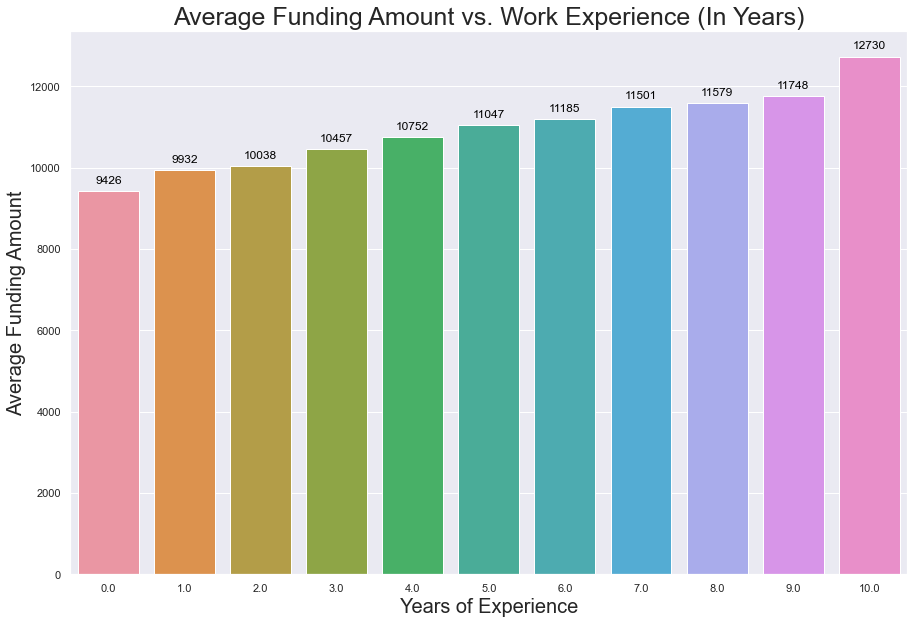

In [210]:
graph_1 = sns.barplot(x=funding_dist_across_employee_length.index, y=funding_dist_across_employee_length.values)
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.title('Average Funding Amount vs. Work Experience (In Years)', fontdict={'fontsize': 25})
plt.xlabel('Years of Experience', fontdict={'fontsize': 20})
plt.ylabel('Average Funding Amount', fontdict={'fontsize': 20})
label_deviation_above_y_axis = funding_dist_across_employee_length.max() * 0.015
for index, value in enumerate(funding_dist_across_employee_length.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, int(value[1]), color='black', ha="center")

In [211]:
funding_dist_across_tenure = raw_data.groupby(by='term').funded_amnt.mean()
funding_dist_across_tenure

term
36     9469.1065782238
60    14998.3240749459
Name: funded_amnt, dtype: float64

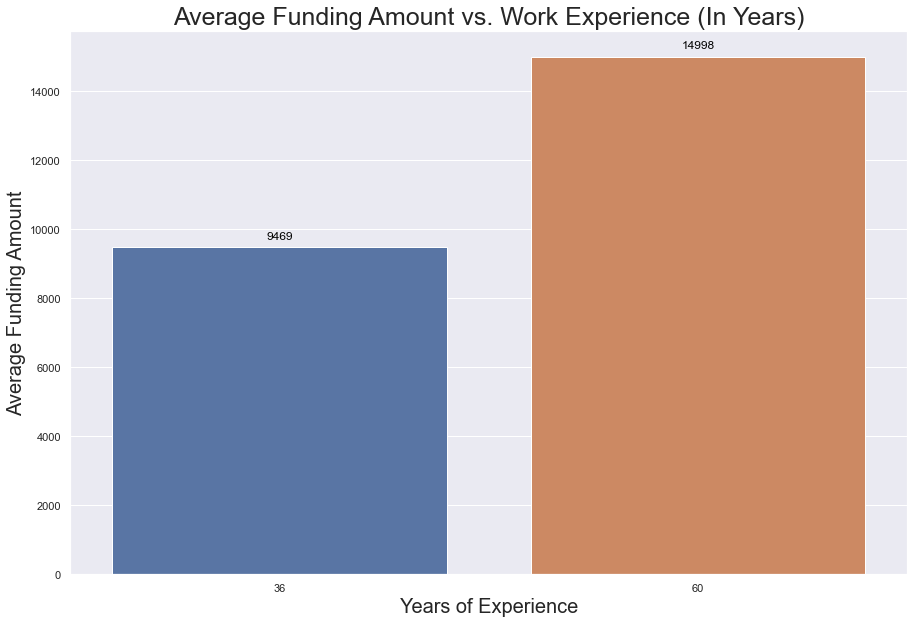

In [232]:
graph_1 = sns.barplot(x=funding_dist_across_tenure.index, y=funding_dist_across_tenure.values)
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation=0)
plt.title('Average Funding Amount vs. Work Experience (In Years)', fontdict={'fontsize': 25})
plt.xlabel('Years of Experience', fontdict={'fontsize': 20})
plt.ylabel('Average Funding Amount', fontdict={'fontsize': 20})
label_deviation_above_y_axis = funding_dist_across_tenure.max() * 0.015
for index, value in enumerate(funding_dist_across_tenure.iteritems()):
    graph_1.text(index, value[1] + label_deviation_above_y_axis, int(value[1]), color='black', ha="center")